# **Создание класса для работы с Hash Table"ом**
Для работы нам потребуется несколько основных методов.

---
```python
def __init__(self) -> None:
    self.hash_table: dict = {0: {}}
    self.count_values: int = 0
    self.divider: int = len(self.hash_table)
    self.bucket: int | None = None
```
- Тут происходит простая инициализация всех данных для работы класса. То есть, мы инициализируем сам **Hash Table**, количество элементов внутри него и делитель (равный количеству **bucket** в текущий момент)
---
```python
def existence(self, key: any) -> bool:
```
- Проверка наличия ключа внутри `dict`
---
```python
def generate_new_dict(self, _type: int = 1):
```
- Генерация нового **Hash Table**. Есть 2 типа генерации
  - `1` - Увеличивает количество `bucket` в **2 раза**
  - `other` - Уменьшает количество `bucket` в **2 раза**
---
```python
def append(self, key: any, value: any):
```
- Метод добавляет новый элемент в `dict`. Но перед этим проверяет наличие значения внутри **Hash Table**. Если значения не будет, то идет проверка с количеством элементов внутри **Hash Table**. Если элементов стало столько же, сколько и количество `bucket` внутри **Hash Table**, тогда вызываем метод:
```python
generate_new_dict(_type=1)
```
Если элемент уже есть, тогда мы просто ничего не добавляем.
---
```python
def remove(self, key: any):
```
- Метод удаляет существующий элемент в `dict`. Но перед этим проверяет наличие значения внутри **Hash Table**. Если значение будет, то идет проверка с количеством элементов внутри **Hash Table**. Если элементов стало столько же, сколько и количество `bucket / 2` внутри **Hash Table**, тогда вызываем метод:
```python
generate_new_dict(_type=0)
```
Если элемента нет, тогда мы просто ничего не добавляем.
---
```python
def get_value(self, key: any):
```
- Получение значения из **Hash Table** по ключу

In [1]:
"""Module providing a function printing python version."""


class HashTable:
    """Hash Table Implementation"""

    def __init__(self) -> None:
        """
        HashTable initialization class
        """
        self.hash_table: dict = {0: {}}
        self.count_values: int = 0
        self.divider: int = len(self.hash_table)
        self.bucket: int | None = None

        print("\n[SYSTEM] - Init hash table!")

    def existence(self, key: any) -> bool:
        """
        Check key in HashTable
        :param key:
        :return:
        """
        self.bucket: int = hash(key) % self.divider

        return key in self.hash_table[self.bucket].keys()

    def generate_new_dict(self, _type: int = 1):
        """
        Update count buckets in HashSet and update position elements in buckets
        :param _type: 1 = Positive, other = Negative
        """
        if _type == 1:
            self.divider: int = self.divider * 2
        else:
            self.divider: int = round(self.divider / 2)

        new_hash_set: dict = {}

        for start in range(0, self.divider):
            new_hash_set[start]: dict = {}

        for start, __value in enumerate(self.hash_table.keys()):
            for key, _value in self.hash_table[start].items():
                bucket: int = hash(key) % self.divider

                new_hash_set[bucket][key] = _value

        self.hash_table: dict = new_hash_set

    def append(self, key: any, value: any):
        """
        Add new value in HashSet
        :param key:
        :param value:
        """
        if not self.existence(key):
            if self.count_values == self.divider:
                self.generate_new_dict()

            self.hash_table[self.bucket][key] = value
            self.count_values += 1

    def remove(self, key: any):
        """
        Remove value in HashSet
        :param key:
        """
        if self.existence(key):
            if self.count_values == round(self.divider / 2):
                self.generate_new_dict(_type=0)

            del self.hash_table[self.bucket][key]
            self.count_values -= 1

    def get_value(self, key: any) -> any:
        """
        Get value of key in HashTable
        :param key:
        :return:
        """
        if self.existence(key):
            bucket: int = hash(key) % self.divider

            return self.hash_table[bucket].get(key, None)

        return None


---

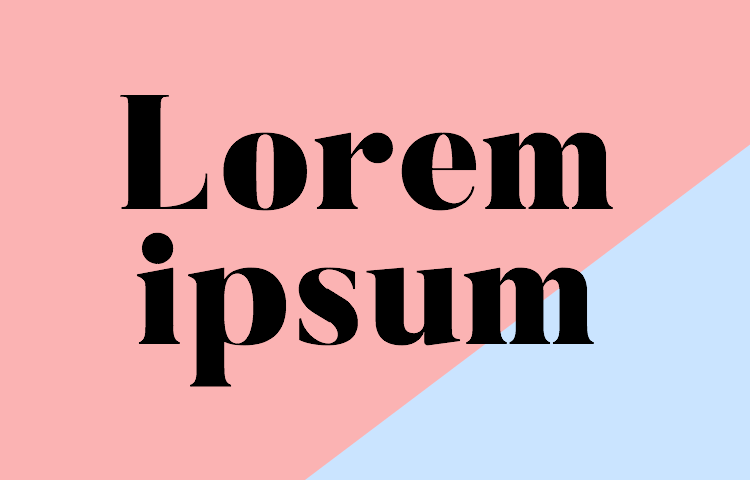

---

Дальше мы создаем новый файл `output-table.json`. В котором и будет храниться **Hash Table**. Файл нужен для наглядной демонстрации того, как на основе **lorem impsum** будет сгенерирован **Hash Table**

Также мы дополнительно убираем лишние символы, чтобы оставить исключительно слова.

In [2]:
import json
import re


def set_default(obj):
    """
    set replace to list type

    :param obj:
    :return:
    """
    if isinstance(obj, set):
        return list(obj)
    raise TypeError


if __name__ == '__main__':
    print(f"\n[System] - Start")

    hash_object: HashTable = HashTable()

    with open('../lorem_ipsum.txt', encoding='UTF-8') as file:
        contents = file.read()

        for word in contents.split():
            word = re.sub("['\"!@#$%^&*()-_=+/\\,.|]", '', word)
            
            hash_object.append(
                key=word,
                value=hash(word)
            )

    with open('../output-table.json', 'w', encoding='UTF-8') as file:
        json.dump(
            obj=hash_object.hash_table,
            default=set_default,
            fp=file
        )

    print(f"\n[System] - End")


[System] - Start

[SYSTEM] - Init hash table!

[System] - End


---
Здесь мы создаем список `without_hash`. Его мы будем использовать для независимого тестирования скорости обработки поиска элемента внутри.

In [3]:
without_hash = dict()

for bucket in hash_object.hash_table.keys():
  for key, value in hash_object.hash_table[bucket].items():
      without_hash[key] = value

print(json.dumps(without_hash))

{"dictumst": -6130833403254437888, "scelerisque": 4707360931673997314, "ipsum": -8856498598916075517, "lorem": 408353971365362179, "neque": 5077255344304230404, "tellus": 4985704492243683332, "eleifend": -2795853255074040313, "commodo": 4373508541746096904, "primis": 5410830686450900749, "parturient": -748378979837405939, "suscipit": -3218534687880361201, "facilisi": -289809528128172016, "quis": -8653939083255658991, "conubia": 5964785741491965969, "est": 7380471793246018836, "leo": 1237869816843910934, "onec": 1930832372099652631, "unc": 7038189753818672664, "laoreet": 6761490769796930073, "nec": -6427056809345991139, "justo": -2110664466276529635, "curae": -2731812068396621794, "quam": -2436534753076678880, "non": 6285170880258103076, "vehicula": 8834991534233886246, "tempus": 220288515758821928, "am": -7780150587426013912, "cursus": -6797158709758976216, "habitant": -8945160813999469527, "dictum": 3909847612531568425, "condimentum": 1477143635829581098, "ed": -5232310542995186133, "



---



Далее идет подключение зависимостей для тестирования скорости.

- `time` - нужен для подсчета времени работы.
- `random` - нужен для выборки любого элемента из `without_hash`

In [4]:
import time
import random



---



В этом тесте будет проверенно `10 000 000` раз операция поиска внутри **Hash Table**. Значения будут браться псевдо-рандомным способом.

> `100 000 000` записей заняло по времени: `132.4818253517151 секунд => 2 минуты 12 секунд` (Google)

In [5]:
# начальное время
start_time = time.time()

for start in range(1, 10_000_000):
  hash_object.existence(random.choice(list(without_hash.keys())))

# конечное время
end_time = time.time()

# разница между конечным и начальным временем
result = end_time - start_time

print('Затраченное время:', round(result, 4), 'секунд')

Затраченное время: 14.8293 секунд




---


В этом тесте будет проверенно `10 000 000` раз операция поиска внутри списка. Значения будут браться псевдо-рандомным способом.

> `100 000 000` записей заняло по времени: `250.30208706855774 => 4 минуты 10 секунд` (Google)

In [6]:
# начальное время
start_time = time.time()

for start in range(1, 10_000_000):
  key_exists = random.choice(list(without_hash.keys())) in without_hash

# конечное время
end_time = time.time()

# разница между конечным и начальным временем
result = end_time - start_time

print('Затраченное время:', round(result, 4), 'секунд')

Затраченное время: 13.0392 секунд
